# Trabalho de Mineração de Dados
Alunos:
- Felipe Martins
- Caio Righetto

### Processamento dos dados

In [6]:
#fazendo os imports necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_raw = pd.read_csv("..\data\smoking_driking_dataset_Ver01.csv")

In [8]:
df_raw.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [10]:
df_raw['sex'].value_counts()

sex
Male      526415
Female    464931
Name: count, dtype: int64

In [11]:
mediaAlturaM = df_raw[df_raw['sex'] == 'Male']['height'].mean()

mediaAlturaM

168.54611855665206

In [12]:
mediaAlturaF = df_raw[df_raw['sex'] == 'Female']['height'].mean()

mediaAlturaF

155.10127309213624

<Axes: >

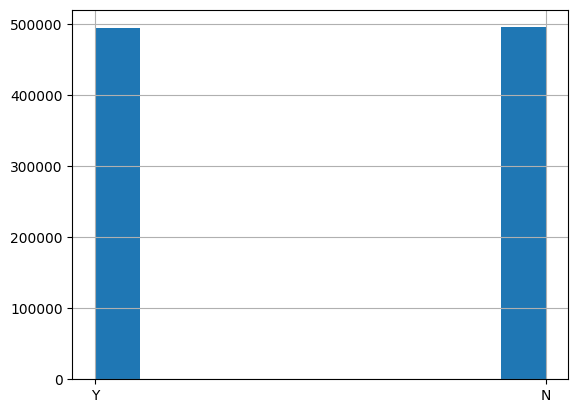

In [13]:
df_raw['DRK_YN'].hist()

In [14]:
#vamos normalizar a coluna sexo, fazendo com que Male = 1 e Female = 0
df_normalized = df_raw

df_normalized['sex'] = df_normalized['sex'].map({'Male': 1, 'Female': 0})

In [15]:
#vamos normalizar a coluna DRK_YN, fazendo com que Y = 1 e N = 0
df_normalized['DRK_YN'] = df_normalized['DRK_YN'].map({'Y': 1, 'N': 0})

In [16]:
df_normalized

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991343,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0


### Modelagem Apriori

In [17]:
#import apyori

In [18]:
#celulas_preenchidas = df_normalized.notna().apply(sum, axis=1)

#celulas_preenchidas

In [20]:
#registros = [set(linha.dropna()) for _, linha in df_normalized[celulas_preenchidas > 1].iterrows()]
#registros[:5]
#minsup = 0.04
#minconf = 0.3

#regras_associacao = apyori.apriori(registros, min_support=minsup, min_confidence=minconf)

"""
for regra in regras_associacao:
  itens = list(regra.items)
  print(
      f'{itens[:-1]} --> [{itens[-1]}] Suporte: {regra.support:.3f}'
      f' Confianca: {regra.ordered_statistics[0].confidence:.3f}'
  )
"""

"\nfor regra in regras_associacao:\n  itens = list(regra.items)\n  print(\n      f'{itens[:-1]} --> [{itens[-1]}] Suporte: {regra.support:.3f}'\n      f' Confianca: {regra.ordered_statistics[0].confidence:.3f}'\n  )\n"

### Modelagem Regressão Logística

In [53]:
#fazendo os imports necessarios
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


y = df_normalized['DRK_YN']
x = df_normalized.drop('DRK_YN',axis=1)


X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=42)


In [35]:
modelo_LR = LogisticRegression()
modelo_LR.fit(X_train,y_train)
y_pred = modelo_LR.predict(X_test)


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
#printando os scores obtidos
print("Pontuacao obtida com X e Y de treino: ", modelo_LR.score(X_train,y_train))
print("Pontuacao obtida com X e Y de teste: ", modelo_LR.score(X_test,y_test))
print("Pontuacao obtida com Y da previsão e o Y real: " , accuracy_score(y_test,y_pred))

Pontuacao obtida com X e Y de treino:  0.7153728015978292
Pontuacao obtida com X e Y de teste:  0.7143743380239068
Pontuacao obtida com Y da previsão e o Y real:  0.7143743380239068


In [58]:
#printando a importancia das features
coeficients = modelo_LR.coef_[0]
feature_names = x.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coeficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
22,SMK_stat_type_cd,0.386025
16,hemoglobin,0.266964
0,sex,0.244508
3,weight,0.038258
13,HDL_chole,0.020269
18,serum_creatinine,0.020024
21,gamma_GTP,0.015321
19,SGOT_AST,0.008410
9,SBP,0.001574
15,triglyceride,0.001096
